<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Vannskade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vise vannskadedata fra Innsikt for ulike skadeårsaker 

## Importere nødvendige biblioteker


In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lese filer lagret lokalt

In [135]:
from google.colab import files
uploaded = files.upload()

Saving vannskade_frost.xlsx to vannskade_frost (1).xlsx
Saving vannskade_tilstopping.xlsx to vannskade_tilstopping (1).xlsx
Saving vannskade_vanninntregning.xlsx to vannskade_vanninntregning.xlsx


## Enkel lineær regresjon

In [ ]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det



## Hente data fra importerte filer

In [141]:
navn = ['år','mnd','skade']
år = np.arange(2000,2030,1)

frost = pd.read_excel('vannskade_frost.xlsx',header=None,skiprows=3,names=navn)
tilstopp = pd.read_excel('vannskade_tilstopping.xlsx',header=None,skiprows=3,names=navn)
intre = pd.read_excel('vannskade_vanninntregning.xlsx',header=None,skiprows=3,names=navn)
#år2 = np.arange(2000,2020,1)
ny = []
data_til = []
for i in år[:-9]:
  data = frost.loc[frost['år']==i,'skade'].sum()
  ny.append(data)
  tilstopp1 = tilstopp.loc[tilstopp['år']==i,'skade'].sum()
  data_til.append(tilstopp1)
data_til
ny


[1700.0,
 2611638.0,
 888364.0,
 4955771.6,
 3672145.0,
 1556527.0,
 3306815.0,
 8973886.0,
 3406666.0,
 9128502.0,
 55594411.93,
 30659908.0,
 15064469.879999999,
 17588067.0,
 4103306.0,
 6035463.0,
 13474188.0,
 9228839.5,
 8285344.63,
 1719910.0,
 33734.0]

In [142]:
data_til


[797647.0,
 638720.0,
 2097183.0,
 2233099.3,
 2171847.0,
 3100582.0,
 5031384.0,
 5674409.0,
 9479455.0,
 8333933.0,
 10649650.0,
 15238862.0,
 9464073.5,
 18063195.88,
 8105007.0,
 14709881.0,
 12720716.83,
 14439516.0,
 14883583.5,
 10820550.83,
 5031010.75]

## Plotte data

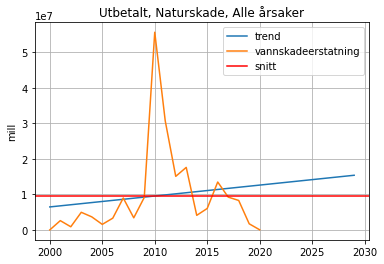

(None, <matplotlib.legend.Legend at 0x7f5b5e21ec88>, None)

In [132]:
#Legger på lineær trend

snitt = np.mean(ny)
a,b = linreg(range(len(ny)),ny)  #//x=skade
extrapolatedtrendline=[a*index + b for index in range(len(år))]

plt.plot(år,extrapolatedtrendline,label="trend")
plt.plot(år[:-9],ny,label="vannskadeerstatning")
plt.axhline(y=snitt,color='r',label='snitt')
plt.title("Utbetalt, Naturskade, Alle årsaker")
plt.ylabel("mill")
plt.grid(),plt.legend(), plt.show()

In [ ]:
# Utbetalt, avsluttet, naturskade, alle årsaker
skade = np.array([216597,300000,120736,900000,500000,2881804,600000,476887,
                  1100000,1200000,929431,10490844,8300000,10631701,4029565,
                  7102580,1192431,3706358,2000000,1200000,379981])
år = np.arange(2000,2030,1)

In [ ]:
#Legger på lineær trend

snitt = np.mean(skade)
a,b = linreg(range(len(skade)),skade)  #//x=skade
extrapolatedtrendline=[a*index + b for index in range(len(år))]

plt.plot(år,extrapolatedtrendline,label="trend")
plt.plot(år[:-9],skade,label="vannskadeerstatning")
plt.axhline(y=snitt,color='r',label='snitt')
plt.title("Utbetalt, Naturskade, Alle årsaker")
plt.ylabel("mill")
plt.grid(),plt.legend(), plt.show()